## 1. Exploración del dataset

In [14]:
import numpy as np # Libreria para manejar matrices y operaciones matematicas
import pandas as pd # Libreria para manejar bases de datos
import matplotlib.pyplot as plt # Libreria para graficar
from sklearn.decomposition import PCA, NMF  # Libreria para hacer PCA
from sklearn.datasets import load_wine # Base de datos de vinos

In [15]:
# Cargar el dataset Wine
data = load_wine()
print(data.DESCR) # Descripcion de la base de datos

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [16]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [17]:
# Visualizar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  p

## 2. Reducción de dimensionalidad con PCA

In [18]:
# Definir una función para realizar y visualizar la reducción dimensional con PCA
def pca_analysis(X, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Explicación de la varianza
    explained_variance = pca.explained_variance_ratio_
    cumsum_variance = np.cumsum(explained_variance)
    
    print(f"\nComponentes: {n_components}")
    print("Varianza explicada por cada componente:", explained_variance)
    print("Varianza acumulada:", cumsum_variance)
    
    # Visualización de la varianza acumulada
    plt.figure()
    plt.plot(range(1, n_components+1), cumsum_variance, marker='o')
    plt.title('Varianza acumulada por PCA')
    plt.xlabel('Número de componentes principales')
    plt.ylabel('Varianza acumulada')
    plt.grid()
    plt.show()
    
    return X_pca

In [19]:
# Separar las características y la etiqueta
y = df['target']
X = df.drop('target', axis=1)


Componentes: 2
Varianza explicada por cada componente: [0.99809123 0.00173592]
Varianza acumulada: [0.99809123 0.99982715]


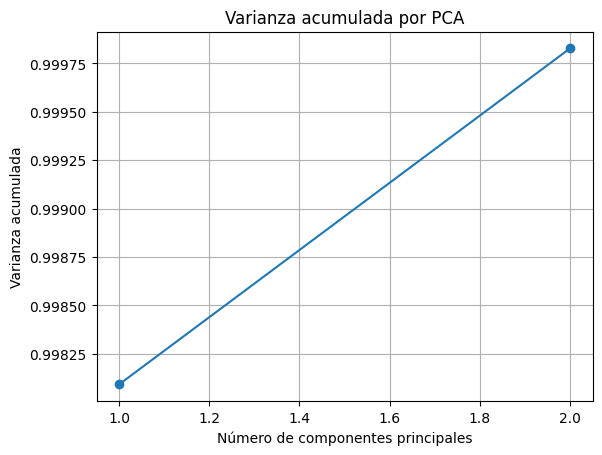

In [20]:
# Aplicar PCA con 2 componentes para visualización
X_pca_2 = pca_analysis(X, n_components=2)

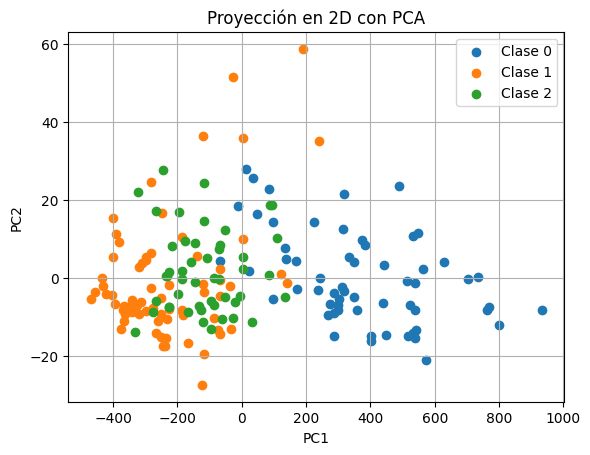

In [21]:
# Visualizar los datos proyectados en 2D
plt.figure()
for label in np.unique(y):
    plt.scatter(X_pca_2[y == label, 0], X_pca_2[y == label, 1], label=f'Clase {label}')
plt.title('Proyección en 2D con PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

## 3. Reducción de dimensionalidad con NMF

In [22]:
# Definir una función para realizar y visualizar la reducción dimensional con NMF
def nmf_analysis(X, n_components):
    nmf = NMF(n_components=n_components, init='random', random_state=0)
    X_nmf = nmf.fit_transform(X)
    
    print(f"\nComponentes: {n_components}")
    print("Reconstrucción del error:", nmf.reconstruction_err_)
    
    return X_nmf

In [23]:
# Aplicar NMF con 2 componentes
X_nmf_2 = nmf_analysis(X, n_components=2)



Componentes: 2
Reconstrucción del error: 70.16829490485611


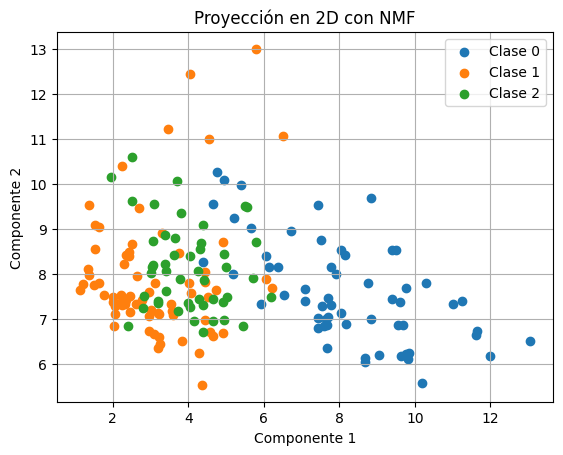

In [24]:
# Visualizar los datos proyectados en 2D
plt.figure()
for label in np.unique(y):
    plt.scatter(X_nmf_2[y == label, 0], X_nmf_2[y == label, 1], label=f'Clase {label}')
plt.title('Proyección en 2D con NMF')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid()
plt.show()